<a href="https://colab.research.google.com/github/Shelb1nchik/cs102/blob/homework06/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_22_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [8]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
df = pd.read_csv('music_genre.csv')

Saving music_genre.csv to music_genre (2).csv
User uploaded file "music_genre.csv" with length 7537937 bytes


In [9]:
from google.colab import drive

df = pd.read_csv('music_genre.csv')

df = df.sample(n = 20000)
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
46181,83657.0,Famous Dex,In The Bank (feat. YoungBoy Never Broke Again),54.0,0.01800,0.720,185344.0,0.579,0.000000,C#,0.1340,-7.299,Major,0.1670,166.002,4-Apr,0.199,Hip-Hop
23438,85869.0,Jelly Roll,Echoes,47.0,0.38500,0.606,237180.0,0.683,0.000000,A,0.1040,-8.780,Minor,0.2400,149.791,4-Apr,0.519,Country
7605,75740.0,Nobuo Uematsu,Battle Theme A,13.0,0.24300,0.495,144627.0,0.816,0.907000,D,0.3610,-5.017,Major,0.0368,152.03,4-Apr,0.895,Anime
4647,48311.0,Cut Copy,Standing In The Middle Of The Field - Tensnake...,37.0,0.49900,0.710,361853.0,0.819,0.000070,C,0.0620,-5.713,Major,0.0345,114.99700000000001,4-Apr,0.599,Electronic
2030,20733.0,The Charlatans,Blackened Blue Eyes,36.0,0.00107,0.448,259867.0,0.910,0.000027,D#,0.3980,-4.889,Major,0.0372,97.021,4-Apr,0.624,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27977,30939.0,Seether,Nobody Praying For Me,63.0,0.00326,0.541,197800.0,0.916,0.000002,G,0.0967,-5.964,Minor,0.0612,?,4-Apr,0.627,Rap
23980,49940.0,Dierks Bentley,Burning Man,74.0,0.00403,0.609,238493.0,0.807,0.000005,F,0.0926,-7.221,Major,0.0972,119.073,4-Apr,0.492,Country
48709,73087.0,Scarlxrd,Lies Yxu Tell,52.0,0.02160,0.556,140643.0,0.992,0.000000,C,0.4530,1.012,Major,0.3570,139.974,4-Apr,0.544,Hip-Hop
11233,45200.0,Gil Scott-Heron,Home Is Where the Hatred Is,46.0,0.26700,0.687,201520.0,0.712,0.010400,A#,0.1850,-9.434,Major,0.0315,98.23100000000001,4-Apr,0.904,Jazz


In [13]:
#Проверка дублирующихся строк:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")


#удаление:
# df = df.drop_duplicates()
# df

Duplicate Rows :


In [15]:
rows_empty = df.loc[df['artist_name'] == 'empty_field']
rows_empty

rows_empty.shape

df = df[(df.artist_name != 'empty_field')]
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
46181,83657.0,Famous Dex,In The Bank (feat. YoungBoy Never Broke Again),54.0,0.01800,0.720,185344.0,0.579,0.000000,C#,0.1340,-7.299,Major,0.1670,166.002,4-Apr,0.199,Hip-Hop
23438,85869.0,Jelly Roll,Echoes,47.0,0.38500,0.606,237180.0,0.683,0.000000,A,0.1040,-8.780,Minor,0.2400,149.791,4-Apr,0.519,Country
7605,75740.0,Nobuo Uematsu,Battle Theme A,13.0,0.24300,0.495,144627.0,0.816,0.907000,D,0.3610,-5.017,Major,0.0368,152.03,4-Apr,0.895,Anime
4647,48311.0,Cut Copy,Standing In The Middle Of The Field - Tensnake...,37.0,0.49900,0.710,361853.0,0.819,0.000070,C,0.0620,-5.713,Major,0.0345,114.99700000000001,4-Apr,0.599,Electronic
2030,20733.0,The Charlatans,Blackened Blue Eyes,36.0,0.00107,0.448,259867.0,0.910,0.000027,D#,0.3980,-4.889,Major,0.0372,97.021,4-Apr,0.624,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27977,30939.0,Seether,Nobody Praying For Me,63.0,0.00326,0.541,197800.0,0.916,0.000002,G,0.0967,-5.964,Minor,0.0612,?,4-Apr,0.627,Rap
23980,49940.0,Dierks Bentley,Burning Man,74.0,0.00403,0.609,238493.0,0.807,0.000005,F,0.0926,-7.221,Major,0.0972,119.073,4-Apr,0.492,Country
48709,73087.0,Scarlxrd,Lies Yxu Tell,52.0,0.02160,0.556,140643.0,0.992,0.000000,C,0.4530,1.012,Major,0.3570,139.974,4-Apr,0.544,Hip-Hop
11233,45200.0,Gil Scott-Heron,Home Is Where the Hatred Is,46.0,0.26700,0.687,201520.0,0.712,0.010400,A#,0.1850,-9.434,Major,0.0315,98.23100000000001,4-Apr,0.904,Jazz


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [53]:
# 2.1 Доля каждого жанра в датасете 
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

df = df['music_genre'].value_counts(normalize=True)
df

Jazz           0.104011
Rock           0.101958
Country        0.101432
Anime          0.101379
Classical      0.100011
Alternative    0.099800
Hip-Hop        0.098853
Electronic     0.098642
Rap            0.097537
Blues          0.096379
Name: music_genre, dtype: float64

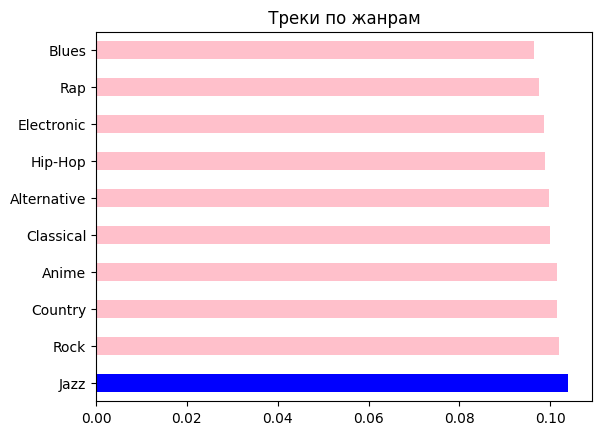

In [54]:
# 2.2 распределение количества треков по жанрам

df = df.plot.barh(x='music_genre', y='Number_of_People',
             title=' Треки по жанрам ', color=['blue', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink'])

In [23]:
# 2.3 вывод самого танцевального жанра (danceability максимальное)
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]
df

str = df[df['danceability']==df['danceability'].max()]
print(str['music_genre'])

46124    Hip-Hop
Name: music_genre, dtype: object


In [24]:
#2.4
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

list_genre = (df.music_genre.unique())[:-1]
all_mode = {}
for i in list_genre:
   
    if len(df.loc[(df["music_genre"] == i)
                  & (df["mode"] == "Major")]) > len(df.loc[(df["music_genre"] == i)
                                                           & (df["mode"] == "Minor")]):
        all_mode[i] = "Major"
    elif len(df.loc[(df["music_genre"] == i)
                  & (df["mode"] == "Major")]) < len(df.loc[(df["music_genre"] == i)
                                                           & (df["mode"] == "Minor")]):
        all_mode[i] = "Minor"

for i in all_mode:
    print(i, all_mode[i])

Hip-Hop Major
Rock Major
Electronic Major
Country Major
Anime Major
Classical Major
Alternative Major
Blues Major
Jazz Major
Rap Major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [26]:
# 3.1 больше всего
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

df = df['artist_name'].value_counts(normalize=True).head(1)
df

Nobuo Uematsu    0.009042
Name: artist_name, dtype: float64

In [27]:
# 3.1 меньше всего
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

df = df['artist_name'].value_counts(normalize=True).tail(1)
df

The Underachievers    0.000053
Name: artist_name, dtype: float64

<BarContainer object of 20 artists>

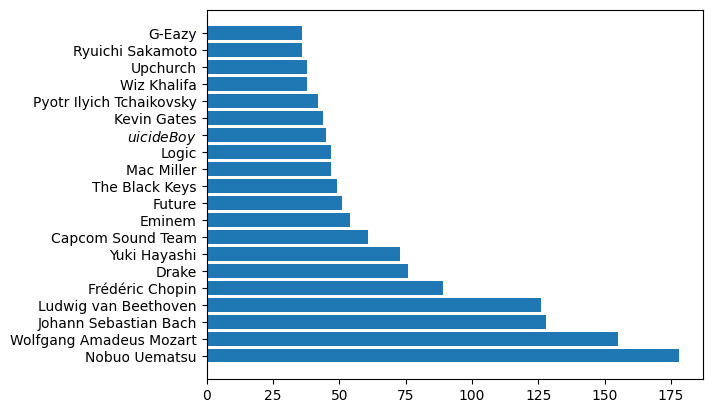

In [28]:
# 3.2
import matplotlib.pyplot as plt

df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

list_artist = (df.artist_name.unique())[:-1]
dict_artist = {}
for i in list_artist:
    dict_artist[i] = len(df.loc[df["artist_name"] == i])
sorted_dict_artist = dict(sorted(dict_artist.items(), key=lambda item: (item[1], item[0]), reverse=True)[:-1])
fig, a = plt.subplots()
x = list(sorted_dict_artist.keys())[:20]
y = list(sorted_dict_artist.values())[:20]

a.barh(x, y)
#Вывод: Прирост количества треков у первых 13 исполнителей(если считать сверху вниз) гораздо меньше чем у оставшихся 7.

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [29]:
# 4.1
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

corrM = df.corr()
corrM

<ipython-input-29-3d807c3e488b>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df.corr()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000,-0.000159,-0.006073,-0.001757,-0.003792,0.011853,-0.009209,0.007061,0.008512,0.002130,-0.000569
popularity,-0.000159,1.000000,-0.285583,0.356054,-0.087748,0.209150,-0.360699,-0.046913,0.310739,0.222740,0.112968
acousticness,-0.006073,-0.285583,1.000000,-0.339354,0.062786,-0.787853,0.389052,-0.109915,-0.727907,-0.155447,-0.257593
danceability,-0.001757,0.356054,-0.339354,1.000000,-0.160948,0.251994,-0.296973,-0.048231,0.378918,0.275393,0.425125
duration_ms,-0.003792,-0.087748,0.062786,-0.160948,1.000000,-0.068267,0.132821,0.022679,-0.107124,-0.096604,-0.129004
energy,0.011853,0.209150,-0.787853,0.251994,-0.068267,1.000000,-0.393316,0.190472,0.837477,0.153279,0.385076
instrumentalness,-0.009209,-0.360699,0.389052,-0.296973,0.132821,-0.393316,1.000000,-0.094804,-0.527720,-0.198381,-0.262973
liveness,0.007061,-0.046913,-0.109915,-0.048231,0.022679,0.190472,-0.094804,1.000000,0.126458,0.110441,0.060333
loudness,0.008512,0.310739,-0.727907,0.378918,-0.107124,0.837477,-0.527720,0.126458,1.000000,0.156617,0.322982
speechiness,0.002130,0.222740,-0.155447,0.275393,-0.096604,0.153279,-0.198381,0.110441,0.156617,1.000000,0.054949


<ipython-input-30-a363175428b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df.corr()


<Axes: >

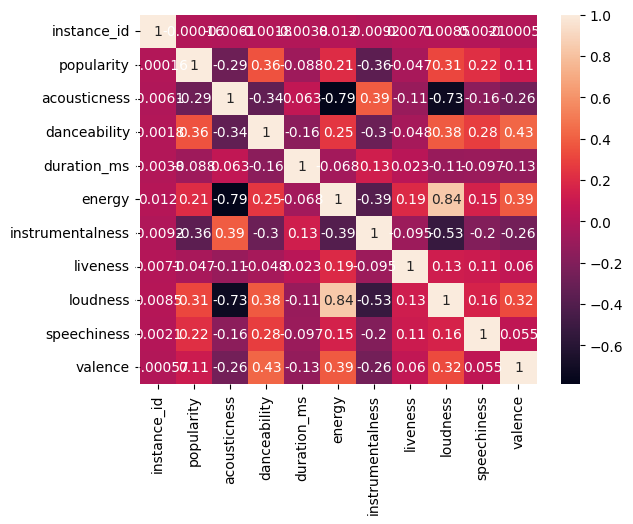

In [30]:
import seaborn as sns
corrM = df.corr()
corrM
sns.heatmap(corrM, annot = True)

In [31]:
# 4.2
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

corr_popd = df["popularity"].corr(df["duration_ms"])
print(corr_popd)

-0.07975326256822696


### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

Text(0, 0.5, 'жанр')

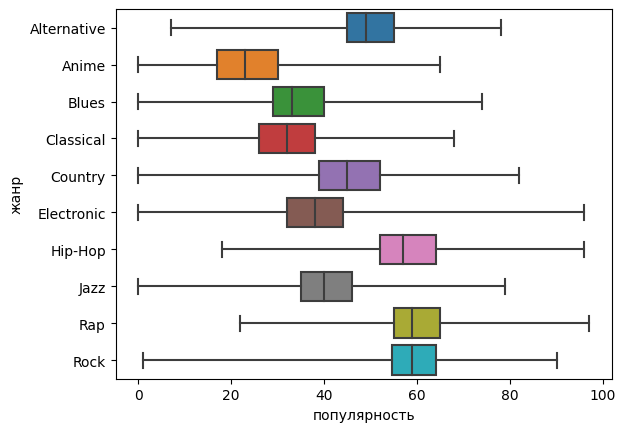

In [32]:
import seaborn as sns
import matplotlib.pyplot as popg

df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

df = df.sort_values(by='music_genre')
sns.boxplot(x='popularity', y='music_genre', data=df, whis = 10)

popg.xlabel('популярность')
popg.ylabel('жанр')

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

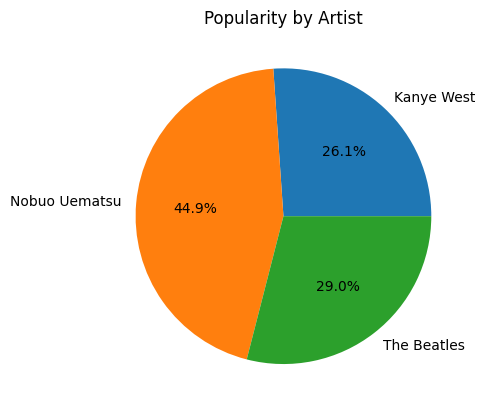

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]



top_genres = df['music_genre'].value_counts().head(3).index.tolist()

top_artists = []
for genre in top_genres:
    subdf = df[df['music_genre'] == genre]
    top_artist = subdf.groupby('artist_name')['popularity'].sum().nlargest(1).index[0]
    top_artists.append(top_artist)
  
subdf = df[(df['music_genre'].isin(top_genres)) & (df['artist_name'].isin(top_artists))]
popularity_by_artist = subdf.groupby('artist_name')['popularity'].sum()
fig, ax = plt.subplots()
ax.pie(popularity_by_artist, labels=popularity_by_artist.index, autopct='%1.1f%%')
ax.set_title('Popularity by Artist')
plt.show()

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

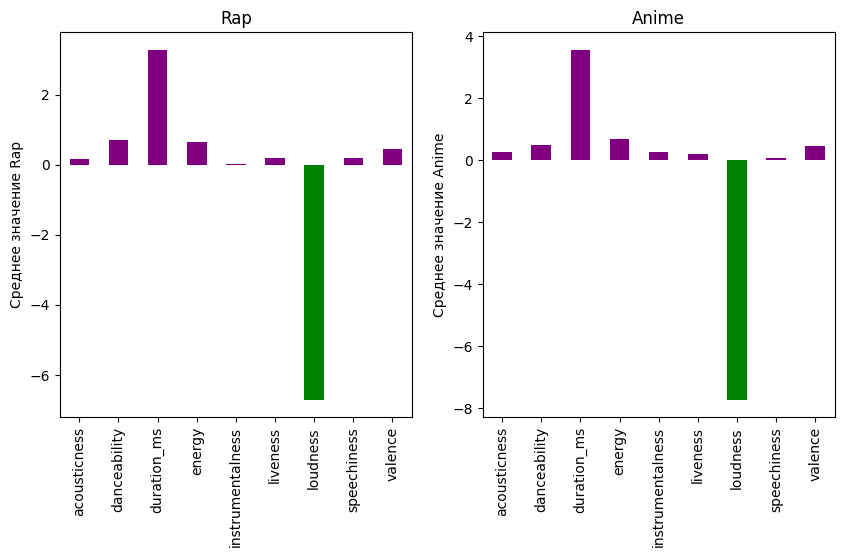

In [34]:
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

import pandas as pd
import matplotlib.pyplot as plt

df.loc[:, "duration_ms"] = df["duration_ms"] / 60000

df = df.drop(["instance_id"], axis=1)
df_mean = df.groupby("music_genre").mean(numeric_only=True)

df_mean = df_mean.sort_values(by="popularity", ascending=False)
df_mean = df_mean.drop(["popularity"], axis=1)

top_genre = df_mean.iloc[0]
bottom_genre = df_mean.iloc[-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(top_genre.name)
ax[1].set_title(bottom_genre.name)

ax[0].set_ylabel(f"Среднее значение {top_genre.name}")
ax[1].set_ylabel(f"Среднее значение {bottom_genre.name}")
ax[0].set_xticks(range(len(df_mean.columns)))
ax[1].set_xticks(range(len(df_mean.columns)))
ax[0].set_xticklabels(df_mean.columns, rotation=90)
ax[1].set_xticklabels(df_mean.columns, rotation=90)


top_genre.plot.bar(ax=ax[0], color=["purple" if x > 0 else "green" for x in top_genre])
bottom_genre.plot.bar(ax=ax[1], color=["purple" if x > 0 else "green" for x in bottom_genre])
plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [35]:
#8.1
import random
random.seed(13)

df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]


def duration_track(duration):
    if duration <= 3 * 60 * 1000:
        return 'короткая'
    elif duration <= 5 * 60 * 1000:
        return 'средняя'
    else:
        return 'длинная'

df['длительность_трека'] = df['duration_ms'].apply(duration_track)
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
13282,53821.0,Terrace Martin,Valdez Off Crenshaw,38.0,0.16300,0.487,271080.0,0.62700,0.806000,A#,0.1380,-8.810,Minor,0.0376,149.727,4-Apr,0.7020,Jazz,средняя
951,81873.0,LCD Soundsystem,Time To Get Away,44.0,0.00366,0.911,251947.0,0.55100,0.068300,G,0.1370,-7.250,Major,0.1000,124.961,4-Apr,0.7330,Electronic,средняя
26420,87757.0,Logic,"The Adventures Of Stoney Bob (ft. Kajo, Slaydr...",61.0,0.10200,0.629,260213.0,0.85000,0.000000,D,0.3370,-6.177,Major,0.3210,95.189,4-Apr,0.7030,Rap,средняя
24189,85964.0,Kip Moore,Love You To The Moon,50.0,0.31600,0.745,-1.0,0.64000,0.000007,G,0.0804,-6.095,Major,0.0342,?,4-Apr,0.8990,Country,короткая
29919,67967.0,Mr. Green,My Guitar,51.0,0.00110,0.870,105234.0,0.53300,0.207000,D,0.2250,-9.498,Major,0.0597,?,4-Apr,0.7420,Rap,короткая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,29868.0,Howlin' Wolf,Back Door Man,38.0,0.74700,0.528,173533.0,0.59200,0.000001,A,0.2030,-14.041,Minor,0.0621,?,4-Apr,0.9250,Blues,короткая
39554,23587.0,Robert DeLong,First Person on Earth,52.0,0.22800,0.454,173448.0,0.80400,0.000000,E,0.1810,-5.225,Minor,0.3710,80.98,4-Apr,0.3440,Rock,короткая
8387,71549.0,Nobuo Uematsu,"Anxious Heart (From ""Final Fantasy VII"") [For ...",13.0,0.99100,0.401,114133.0,0.00438,0.895000,D#,0.0848,-38.833,Major,0.0774,79.07600000000001,4-Apr,0.2030,Anime,короткая
17215,45573.0,NEEDTOBREATHE,Difference Maker,48.0,0.67600,0.652,340000.0,0.32300,0.002450,F#,0.1020,-13.705,Major,0.0304,114.038,4-Apr,0.0753,Alternative,длинная


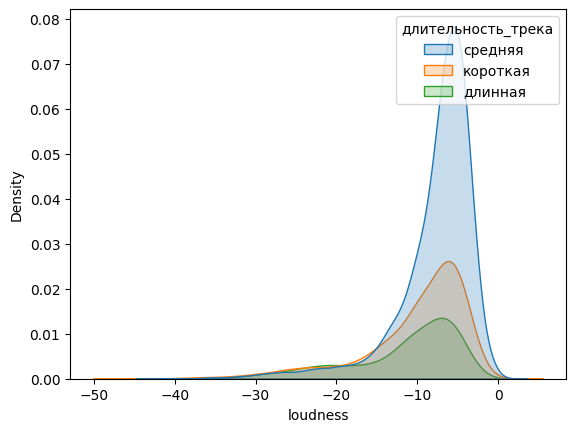

In [36]:
# 8.2
import seaborn as sns
sns.kdeplot(data=df, x='loudness', hue='длительность_трека', fill=True)
plt.show()

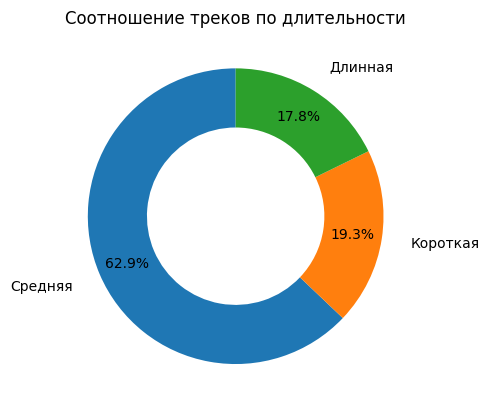

In [37]:
#8.3
duration_bins = [0, 180000, 300000, float('inf')]
duration_labels = ['Короткая', 'Средняя', 'Длинная']
df['duration_ms'] = pd.cut(df['duration_ms'], bins=duration_bins, labels=duration_labels)  # срез по корзинам
duration_counts = df['duration_ms'].value_counts()
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4}, labeldistance=1.2, pctdistance=0.8)
plt.title('Соотношение треков по длительности')
plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]